### <font color='lightblue'>Clase 3 Youtube</font> 

Clase 3 Analísis exploratorio de texto

In [133]:
#Importar Librerías
import spacy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import seaborn as sns


### <font color='lightblue'>Ejercicio practico</font>  

TVPerú Noticias

Cuenta @noticias_tvperu

In [2]:
df=pd.read_csv('tweets_noticias.csv')  
df

,Tweet,Id
0,Presidenta Dina Boluarte participa en IV reuni...,0
1,Presidenta Dina Boluarte: “Nunca antes en la h...,1
2,Presidenta Dina Boluarte: “El Perú es el segun...,2
3,Más de 90 vicuñas fueron asesinadas en Cusco. ...,3
4,"La ministra de Cultura, Leslie Urteaga, indicó...",4
5,Se reportó que al menos 200 vicuñas habrían s...,5
6,Mantente informado sobre las condiciones del ...,6


In [3]:
unique_string=(" ".join(df.Tweet))
unique_string

'Presidenta Dina Boluarte participa en IV reunión de jefes de Estado y gobiernos de los países signatarios del TCA. #EnVivo Presidenta Dina Boluarte: “Nunca antes en la historia, la Amazonía ha estado tan amenazada como hoy. Por ello, el propósito que nos convoca no puede ser otro que el desarrollo integral, sostenible e inclusivo de nuestra Amazonía”. #EnVivo Presidenta Dina Boluarte: “El Perú es el segundo país con mayor extensión de bosques y población amazónica, lo que ha formado nuestra visión de una Amazonía con rostro humano”. #EnVivo Más de 90 vicuñas fueron asesinadas en Cusco. Comuneros de Chumbivilcas denunciaron que cazadores han atentado contra esta especie protegida que es también patrimonio de la nación. La ministra de Cultura, Leslie Urteaga, indicó que la presidenta Dina Boluarte llega a Brasil para comunicar todo lo que se viene haciendo, desde el Gobierno peruano, por la Amazonía.  Se reportó que al menos 200 vicuñas habrían sido asesinadas.  Mantente informado sobre

In [5]:
#Descargar Pipeline (Spanish)
!python -m spacy download es_core_news_sm -q

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [26]:
#Cargar Pipeline Model
nlp = spacy.load("es_core_news_sm")###nlp es un objeto de lenguaje 

In [27]:
#Crear Doc Object
doc = nlp(unique_string)

In [4]:
def token_stop(documento):
   lista_token=list()
   lista_stop=list()
   lista_lema=list()
   lista_pos=list()
   for token in documento:
     if not token.is_stop and not token.is_punct and not token.like_url and not token.is_digit and not token.is_quote and not token.like_email and not  token.like_num:
       lista_token.append(token.text)
       lista_stop.append(token.is_stop)
       lista_lema.append(token.lemma_)
       lista_pos.append(token.pos_)
    
   df = pd.DataFrame(list(zip(lista_token,lista_stop,lista_lema, lista_pos)), columns = ['Token','Stopword',"Lemma","Poss"])
   return df

In [9]:
df_unico=token_stop(doc)
df_unico

,Token,Stopword,Lemma,Poss
0,Presidenta,False,Presidenta,PROPN
1,Dina,False,Dina,PROPN
2,Boluarte,False,Boluarte,PROPN
3,participa,False,participar,VERB
4,IV,False,IV,PROPN
...,...,...,...,...
82,Predicción,False,Predicción,PROPN
83,Meteorológica,False,Meteorológica,PROPN
84,@Senamhiperuen,False,@Senamhiperuen,PROPN
85,bloque,False,bloque,NOUN


In [132]:
def mas_frecuentes(column_token, n):
    empty_list=[]
    for i in  column_token:
        empty_list.append(i)
    
    word_freq = Counter(empty_list)
    common_nouns = dict(word_freq.most_common(n))

    l1=[]
    l2=[]
    for i, j in common_nouns.items():
        l1.append(i)
        l2.append(j)
    df_listo = pd.DataFrame(list(zip(l1,l2)), columns = ['Token','Freq'])
    df_listo

    return df_listo

mas_frecuentes(df_unico["Token"], 5)

    


,Token,Freq
0,Dina,4
1,Boluarte,4
2,Amazonía,4
3,Presidenta,3
4,EnVivo,3


(1.0, 5.0)

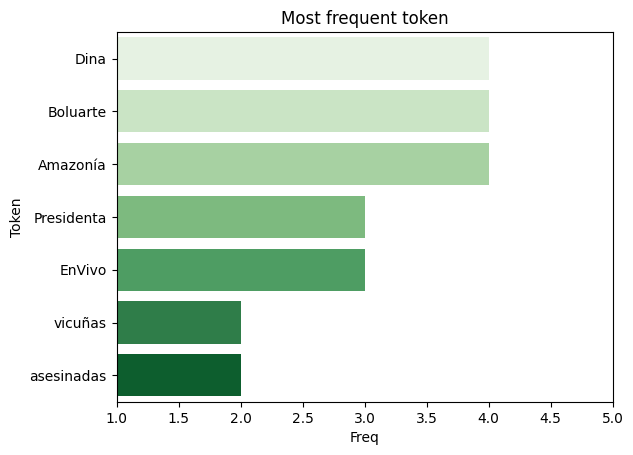

In [148]:
def Exploratory_text_analisis(datos):
    plt.title('Most frequent token')
    ax=sns.barplot(data=datos, x="Freq", y="Token", orient="h",palette="Greens").set_xlim(1,max(df_listo["Freq"] + 1))

    return ax


Exploratory_text_analisis(mas_frecuentes(df_unico["Token"], 7))








In [142]:
print("Nube de palabras a nivel de concatenación de textos.")

unique_string=(" ").join(df_unico["Token"])
unique_string


Nube de palabras a nivel de concatenación de textos.


'Presidenta Dina Boluarte participa IV reunión jefes gobiernos países signatarios TCA EnVivo Presidenta Dina Boluarte historia Amazonía amenazada propósito convoca desarrollo integral sostenible inclusivo Amazonía EnVivo Presidenta Dina Boluarte Perú país extensión bosques población amazónica formado visión Amazonía rostro humano EnVivo vicuñas asesinadas Cusco Comuneros Chumbivilcas denunciaron cazadores atentado especie protegida patrimonio nación ministra Cultura Leslie Urteaga presidenta Dina Boluarte llega Brasil comunicar viene Gobierno peruano Amazonía   reportó vicuñas habrían asesinadas   Mantente informado condiciones tiempo pronósticos meteorológicos Kelita Quispe directora Predicción Meteorológica @Senamhiperuen bloque ElTiempoEnTVPerú'

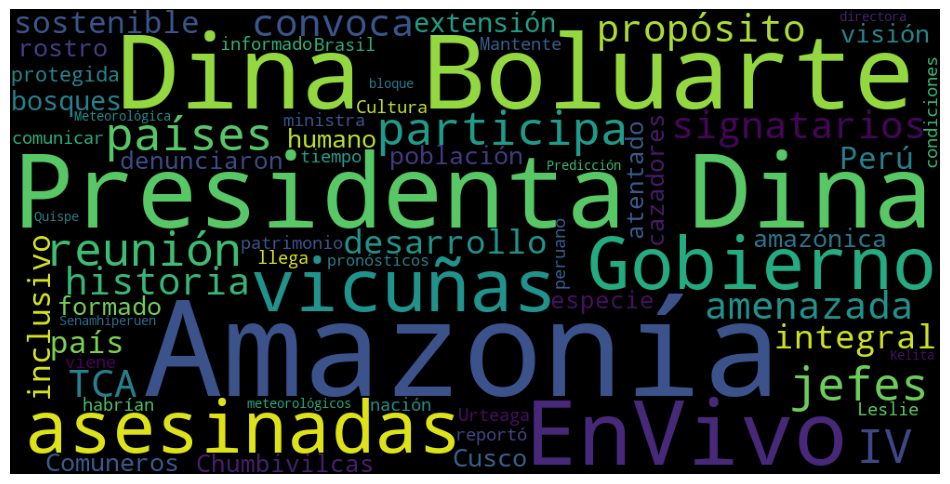

In [144]:
def nube_palabras(string):
    stop_words = ["@Senamhiperuen","ElTiempoEnTVPerú","son","e", "vivo","señal"] + list(STOPWORDS)

    wordcloud = WordCloud(width = 1000, height = 500, stopwords = stop_words).generate(string)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

nube_palabras(unique_string)